# Análise de Dados Abertos


In [32]:
import pandas as pd
import numpy as np
from babel.numbers import format_compact_currency
import matplotlib.pyplot as plt
import locale

locale.setlocale(locale.LC_ALL, "pt_BR")
plt.style.use("bmh")
excelsheet = "../data/criptoativos_dados_abertos_07082023.xls"

# Carrega a planilha excel
with pd.ExcelFile(excelsheet) as xls:
    df1 = pd.read_excel(
        xls,
        "Relatorio1",
        skiprows=9,
        decimal=",",
        parse_dates=[0],
        date_format="%B de %Y",
        usecols=[0, 3, 6, 7, 8],
    )
    df2 = pd.read_excel(
        xls,
        "Relatorio2",
        skiprows=5,
        parse_dates=[0],
        date_format="%B de %Y",
        decimal=".",
    )
    df3 = pd.read_excel(
        xls,
        "Relatório3",
        skiprows=5,
        parse_dates=[0],
        date_format="%B de %Y",
        header=[0, 1],
    )
    df4 = pd.read_excel(
        xls,
        "Relatorio4",
        skiprows=13,
        decimal=",",
        parse_dates=[1],
        date_format="%B de %Y",
    )


## Total de Valores Declarados por Ano


Text(0.5, 0, '')

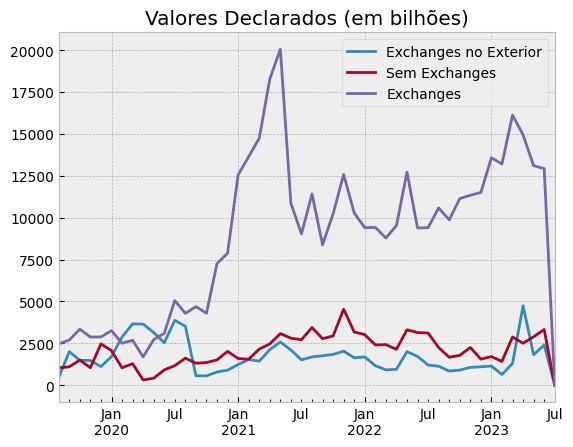

In [33]:
# Renderiza Relatório1
df1 = df1.rename(
    columns={
        "Unnamed: 0": "Ano",
        "Subtotal": "Exchanges no Exterior",
        "Subtotal.1": "Sem Exchanges",
        "Somente PJ": "Exchanges",
        "Unnamed: 8": "Total",
    }
)

df1.plot(x=df1.columns[0], y=df1.columns[1:4])
plt.title("Valores Declarados (em bilhões)")
plt.xlabel("")


## Quantidade de CPF/CNPJ Únicos


In [34]:
# Renderiza Relatório2
df2_new = df2.groupby(pd.Grouper(key=df2.columns[0], freq="Y")).sum()
df2_new


,CNPJ,CPF
MÊS/ANO,,
2019-12-31,12121,680054
2020-12-31,37611,1500287
2021-12-31,78290,6030838
2022-12-31,406008,11868506
2023-12-31,409524,11432616


## Operações por gênero


Text(0, 0.5, '')

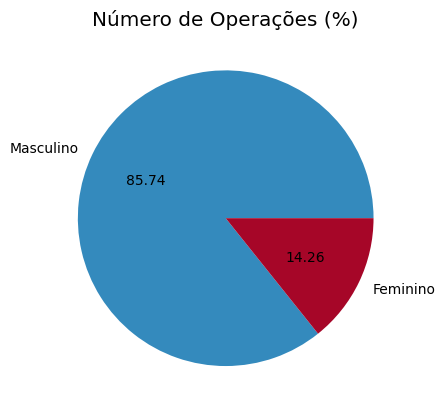

In [48]:
# Renderiza Relatório3, parte 1
# Não vai ser possível unir os dados, já que são porcentagens!
# Apresenta a participação de cada gênero em relação ao número de operações e aos valores declarados.

df3_new = pd.DataFrame(
    [df3["% Nº Operações"]["Masculino"].sum(), df3["% Nº Operações"]["Feminino"].sum()]
)
df3_new.plot.pie(
    subplots=True, autopct="%.2f", labels=["Masculino", "Feminino"], legend=False
)
plt.title("Número de Operações (%)")
plt.ylabel("")


## Criptoativos Declarados


Text(0.5, 1.0, 'Top 5 Criptomoedas Declaradas')

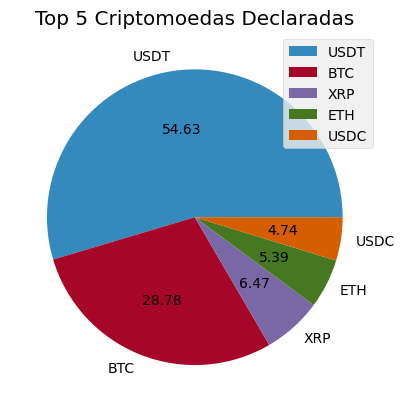

In [129]:
# Renderiza Relatório 4
# https://stackoverflow.com/questions/39922986/how-do-i-pandas-group-by-to-get-sum
# https://pbpython.com/pandas-grouper-agg.html

df4_new = (
    df4.groupby(["CRIPTOATIVO"])
    .sum(numeric_only=True)
    .sort_values(by="VALOR TOTAL DAS OPERAÇÕES", ascending=False)
)

df4_new["VALOR TOTAL DAS OPERAÇÕES"][:5].plot.pie(legend=True, autopct="%.2f")
plt.ylabel("")
plt.title("Top 5 Criptomoedas Declaradas")
